<a href="https://colab.research.google.com/github/NidaNabi/new-york-city-taxi-fare-prediction/blob/main/farepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#uploading data from kaggle

!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip new-york-city-taxi-fare-prediction.zip

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
train=pd.read_csv('train.csv',nrows=1000000)
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#data cleaning and preprocessing
train.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [ ]:
train = train.dropna(how = 'any', axis = 'rows')

In [ ]:
train.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [ ]:
train.drop(['key'], axis=1,inplace=True)
train.drop(['pickup_datetime'], axis=1,inplace=True)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.drop(train[train['pickup_longitude'] == 0].index, axis=0, inplace = True)
train.drop(train[train['pickup_latitude'] == 0].index, axis=0, inplace = True)
train.drop(train[train['dropoff_longitude'] == 0].index, axis=0, inplace = True)
train.drop(train[train['dropoff_latitude'] == 0].index, axis=0, inplace = True)
train.drop(train[train['passenger_count'] > 5].index, axis=0, inplace = True)
train.drop(train[train['passenger_count'] == 0].index, axis=0, inplace = True)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.dropna(inplace=True)

train.drop(train.index[(train.pickup_longitude < -75) | 
           (train.pickup_longitude > -72) | 
           (train.pickup_latitude < 40) | 
           (train.pickup_latitude > 42)],inplace=True)
train.drop(train.index[(train.dropoff_longitude < -75) | 
           (train.dropoff_longitude > -72) | 
           (train.dropoff_latitude < 40) | 
           (train.dropoff_latitude > 42)],inplace=True)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#data visualization -plot between distances and fare amount
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


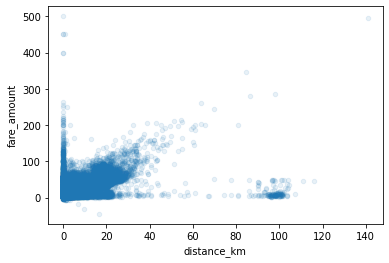

In [ ]:
from geopy import Point
from geopy.distance import distance
train["point1"]=train.apply(lambda row: Point(latitude=row['pickup_latitude'], longitude=row['pickup_longitude']), axis=1)
train["point2"]=train.apply(lambda row: Point(latitude=row['dropoff_latitude'], longitude=row['dropoff_longitude']), axis=1)
train['distance_km'] = train.apply(lambda row: distance(row['point1'], row['point2']).km, axis=1)
train.plot(kind="scatter",x="distance_km",y="fare_amount",alpha=0.1)

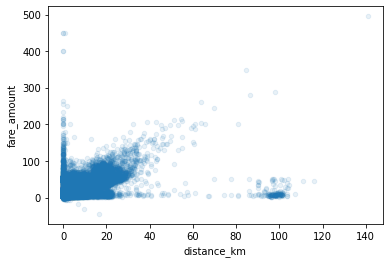

In [ ]:
train.drop(train[train['fare_amount'] == 0].index, axis=0, inplace = True)
train.drop(train[train['distance_km'] == 0].index, axis=0, inplace = True)
train.plot(kind="scatter",x="distance_km",y="fare_amount",alpha=0.1)

In [ ]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,point1,point2,distance_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,"40 43m 16.7484s N, 73 50m 39.5196s W","40 42m 44.2008s N, 73 50m 29.796s W",1.029601
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,"40 42m 40.6908s N, 74 0m 57.7728s W","40 46m 55.2144s N, 73 58m 45.3648s W",8.443441
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,"40 45m 40.572s N, 73 58m 57.8568s W","40 45m 2.0232s N, 73 59m 28.4712s W",1.389132
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,"40 43m 59.3148s N, 73 59m 13.668s W","40 45m 29.1312s N, 73 59m 29.6412s W",2.795790
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,"40 46m 4.8288s N, 73 58m 5.142s W","40 47m 1.5432s N, 73 57m 23.958s W",1.998338


In [ ]:
train.drop(['point2'], axis=1,inplace=True)
train.drop(['point1'], axis=1,inplace=True)
train.drop(['distance_km'], axis=1,inplace=True)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#checking test data
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
#preprocessing test data
test.drop(['key'], axis=1,inplace=True)
test.drop(['pickup_datetime'], axis=1,inplace=True)
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
#data pipelining-finding errors and accuracy using different models
from sklearn.tree import DecisionTreeRegressor
train_features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
X_train,y_train = train[train_features],train['fare_amount']
prred = DecisionTreeRegressor(random_state=1)
prred.fit(X_train, y_train)
X_test = test
y_test=prred.predict(X_test)
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((944605, 5), (944605,), (9914, 5), (9914,))

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from copy import deepcopy

std_scaler= StandardScaler().fit(X_train)
min_max_scaler = MinMaxScaler().fit(X_train)

def preprocessor(X):
    A=np.copy(X)
    A[:, :]=std_scaler.transform(X)
    A[:, :]=min_max_scaler.transform(X)
    return A

In [ ]:
preprocessor(X_test)

array([[0.43916227, 0.40690769, 0.35504761, 0.37322879, 0.        ],
       [0.4331841 , 0.38148772, 0.34874162, 0.3707669 , 0.        ],
       [0.43509918, 0.39972876, 0.3556892 , 0.37445236, 0.        ],
       ...,
       [0.43109259, 0.38562215, 0.42429493, 0.32179854, 1.25      ],
       [0.43375329, 0.39067122, 0.37031096, 0.40398117, 1.25      ],
       [0.43267217, 0.40133691, 0.34823725, 0.38140065, 1.25      ]])

In [ ]:
preprocess_transformer = FunctionTransformer(preprocessor)
preprocess_transformer

FunctionTransformer(func=<function preprocessor at 0x7f378a057790>)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

p1=Pipeline([("scaler",preprocess_transformer),("linear regression",LinearRegression())])
p1

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x7f378a057790>)),
                ('linear regression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error

def fitnprint(p,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    p.fit(X_train,y_train)
    train_pred=p.predict(X_train)
    test_pred=p.predict(X_test)
    print("training error "+ str(mean_absolute_error(train_pred,y_train)))
    print("testing error "+ str(mean_absolute_error(test_pred,y_test)))
    

In [ ]:
fitnprint(p1)

training error 5.081885783047228
testing error 5.158839619794275


In [ ]:

from sklearn.neighbors import KNeighborsRegressor as KNR
p2=Pipeline([("scaler",preprocess_transformer),("knn regression",KNR())])
fitnprint(p2)


training error 1.7238313199697224
testing error 2.151866854952592


In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
p3=Pipeline([("scaler",preprocess_transformer),("random forest",RFR(n_estimators=10,max_depth=7))])
fitnprint(p3)

training error 3.444395699987429
testing error 3.5090403553359533


In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [ ]:
x = train[['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
y = train['fare_amount']
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))
sqrt(mean(absolute(scores)))

2.2543225951190555